In [1]:
import numpy as np
import pandas as pd

# --- Setup ---
# Inputs (x1, x2)
inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# Target outputs for x1 NOR x2
targets = np.array([1, 0, 0, 0])

# Add bias input (x0 = 1)
X = np.insert(inputs, 0, 1, axis=1)

# --- Training Parameters ---
weights = np.array([0.0, 0.0, 0.0])
learning_rate = 1
max_epochs = 10 # Set a max number of epochs to prevent infinite loops

# Store training data for CSV export
training_data = []

# --- Table Header ---
header = "| Epoch | x₁ | x₂ | t | x = (1, x₁, x₂) | Current w = (w₀, w₁, w₂) | w · x | y | e | Δw = e · x      | New w = (w₀, w₁, w₂) |"
separator = "|:-----:|:--:|:--:|:-:|:---------------:|:-------------------------:|:-----:|:-:|:-:|:----------------:|:---------------------:|"
print(header)
print(separator)

# Initial state print
initial_w_str = f"({weights[0]:.0f}, {weights[1]:.0f}, {weights[2]:.0f})"
print(f"|       |    |    |   |                 | **{initial_w_str}** |       |   |   |                  |                       |")


# --- Training Loop ---
for epoch in range(1, max_epochs + 1):
    updates_in_epoch = 0
    for i in range(len(X)):
        x_vec = X[i]
        target = targets[i]
        
        # Store current weights for printing
        current_w_str = f"({weights[0]:.0f}, {weights[1]:.0f}, {weights[2]:.0f})"
        
        # 1. Calculate net input
        net_input = np.dot(weights, x_vec)
        
        # 2. Apply step function
        y = 1 if net_input >= 0 else 0
        
        # 3. Calculate error
        error = target - y
        
        # 4. Calculate weight update
        delta_w = learning_rate * error * x_vec
        
        # Store data for CSV
        training_data.append({
            'Epoch': epoch,
            'x1': x_vec[1],
            'x2': x_vec[2],
            'target': target,
            'x0': x_vec[0],
            'w0_current': float(current_w_str.split(',')[0].strip('(').strip()),
            'w1_current': float(current_w_str.split(',')[1].strip()),
            'w2_current': float(current_w_str.split(',')[2].strip(')').strip()),
            'net_input': net_input,
            'y': y,
            'error': error,
            'delta_w0': delta_w[0],
            'delta_w1': delta_w[1],
            'delta_w2': delta_w[2],
            'w0_new': weights[0] + delta_w[0],
            'w1_new': weights[1] + delta_w[1],
            'w2_new': weights[2] + delta_w[2]
        })
        
        # 5. Update weights
        if error != 0:
            updates_in_epoch += 1
        weights += delta_w
        
        # --- Print table row ---
        x_str = f"({x_vec[0]}, {x_vec[1]}, {x_vec[2]})"
        delta_w_str = f"({delta_w[0]:.0f}, {delta_w[1]:.0f}, {delta_w[2]:.0f})"
        new_w_str = f"({weights[0]:.0f}, {weights[1]:.0f}, {weights[2]:.0f})"

        print(f"| **{epoch}** | {x_vec[1]}  | {x_vec[2]}  | {target} | {x_str: <15} | {current_w_str: <25} | {net_input: >5.0f} | {y} | {error: >1.0f} | {delta_w_str: <16} | {new_w_str: <21} |")

    # Check for convergence
    if updates_in_epoch == 0:
        print(f"\nConvergence reached in Epoch {epoch}. No further updates.")
        break

| Epoch | x₁ | x₂ | t | x = (1, x₁, x₂) | Current w = (w₀, w₁, w₂) | w · x | y | e | Δw = e · x      | New w = (w₀, w₁, w₂) |
|:-----:|:--:|:--:|:-:|:---------------:|:-------------------------:|:-----:|:-:|:-:|:----------------:|:---------------------:|
|       |    |    |   |                 | **(0, 0, 0)** |       |   |   |                  |                       |
| **1** | 0  | 0  | 1 | (1, 0, 0)       | (0, 0, 0)                 |     0 | 1 | 0 | (0, 0, 0)        | (0, 0, 0)             |
| **1** | 0  | 1  | 0 | (1, 0, 1)       | (0, 0, 0)                 |     0 | 1 | -1 | (-1, 0, -1)      | (-1, 0, -1)           |
| **1** | 1  | 0  | 0 | (1, 1, 0)       | (-1, 0, -1)               |    -1 | 0 | 0 | (0, 0, 0)        | (-1, 0, -1)           |
| **1** | 1  | 1  | 0 | (1, 1, 1)       | (-1, 0, -1)               |    -2 | 0 | 0 | (0, 0, 0)        | (-1, 0, -1)           |
| **2** | 0  | 0  | 1 | (1, 0, 0)       | (-1, 0, -1)               |    -1 | 0 | 1 | (1, 0, 0)        | (0, 0,

In [2]:
# Save training data to CSV file
df = pd.DataFrame(training_data)
df.to_csv('perceptron_training_data.csv', index=False)
print("Training data saved to 'perceptron_training_data.csv'")
print(f"Data shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())

Training data saved to 'perceptron_training_data.csv'
Data shape: (16, 17)

First few rows:
   Epoch  x1  x2  target  x0  w0_current  w1_current  w2_current  net_input  \
0      1   0   0       1   1         0.0         0.0         0.0        0.0   
1      1   0   1       0   1         0.0         0.0         0.0        0.0   
2      1   1   0       0   1        -1.0         0.0        -1.0       -1.0   
3      1   1   1       0   1        -1.0         0.0        -1.0       -2.0   
4      2   0   0       1   1        -1.0         0.0        -1.0       -1.0   

   y  error  delta_w0  delta_w1  delta_w2  w0_new  w1_new  w2_new  
0  1      0         0         0         0     0.0     0.0     0.0  
1  1     -1        -1         0        -1    -1.0     0.0    -1.0  
2  0      0         0         0         0    -1.0     0.0    -1.0  
3  0      0         0         0         0    -1.0     0.0    -1.0  
4  0      1         1         0         0     0.0     0.0    -1.0  


In [3]:
%pip install graphviz


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


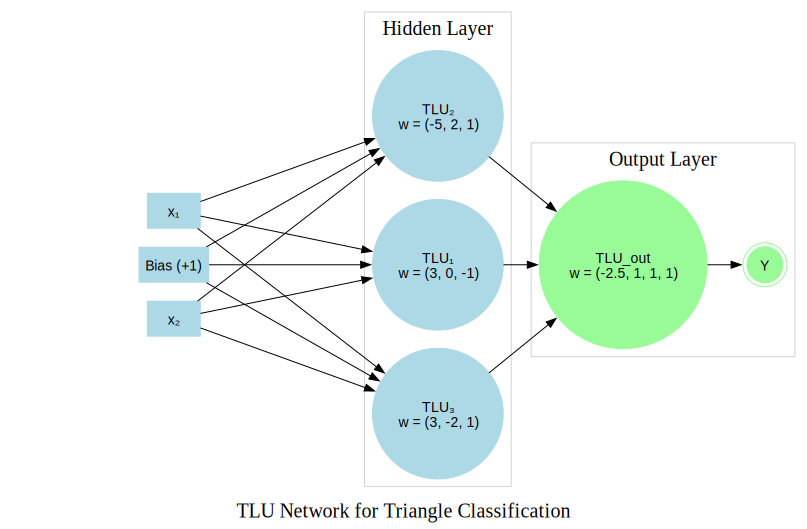

In [5]:
import graphviz

# Create a new directed graph
g = graphviz.Digraph('TLU_Network')
g.attr(rankdir='LR', splines='line', label='TLU Network for Triangle Classification', fontsize='20')

# Define graph-wide styles for nodes and edges
g.attr('node', shape='circle', style='filled', color='lightblue', fontname='Helvetica')
g.attr('edge', fontname='Helvetica', fontsize='10')

# 1. Input Layer
# Use a subgraph to align the input nodes
with g.subgraph(name='cluster_0') as c:
    c.attr(style='invis') # Make the subgraph box invisible
    c.node('x1', 'x₁', shape='plaintext')
    c.node('x2', 'x₂', shape='plaintext')
    c.node('bias_in', 'Bias (+1)', shape='plaintext')

# 2. Hidden Layer (Boundary Detectors)
with g.subgraph(name='cluster_1') as c:
    c.attr(label='Hidden Layer', color='lightgrey')
    c.node('TLU1', 'TLU₁\nw = (3, 0, -1)')
    c.node('TLU2', 'TLU₂\nw = (-5, 2, 1)')
    c.node('TLU3', 'TLU₃\nw = (3, -2, 1)')

# 3. Output Layer (AND Gate)
with g.subgraph(name='cluster_2') as c:
    c.attr(label='Output Layer', color='lightgrey')
    c.node('TLU_out', 'TLU_out\nw = (-2.5, 1, 1, 1)', color='palegreen')
    c.node('Y', 'Y', shape='doublecircle', color='palegreen')


# --- Define Edges (Connections) ---

# Connections from Inputs to Hidden Layer
g.edge('x1', 'TLU1')
g.edge('x1', 'TLU2')
g.edge('x1', 'TLU3')

g.edge('x2', 'TLU1')
g.edge('x2', 'TLU2')
g.edge('x2', 'TLU3')

g.edge('bias_in', 'TLU1')
g.edge('bias_in', 'TLU2')
g.edge('bias_in', 'TLU3')

# Connections from Hidden Layer to Output Layer
g.edge('TLU1', 'TLU_out')
g.edge('TLU2', 'TLU_out')
g.edge('TLU3', 'TLU_out')

# Connection from Output TLU to the final result
g.edge('TLU_out', 'Y')

# Simply calling the object 'g' at the end of the cell
# will render the diagram in the notebook's output.
g

In [ ]:
# =============================================================================
# PRODUCTION IMPUTATION MODULE TEST
# Test the production biomarker imputation pipeline from the codebase
# =============================================================================

print("Testing Production Biomarker Imputation Pipeline")
print("=" * 60)

# Import the production imputation pipeline from our codebase
import sys
import os
sys.path.append('/Users/blair.dupre/Library/CloudStorage/GoogleDrive-dupre.blair92@gmail.com/My Drive/CSCI FALL 2025/src')

from giman_pipeline.data_processing import BiommarkerImputationPipeline

# Test the production pipeline on our dataset
print("\n1. Loading the dataset for production testing...")
# Use the same enhanced dataset from our previous work
df_test = df_enhanced.copy()
print(f"Dataset shape: {df_test.shape}")

# Initialize the production imputation pipeline
print("\n2. Initializing production imputation pipeline...")
biomarker_imputer = BiommarkerImputationPipeline(
    knn_neighbors=5,
    mice_max_iter=10,
    mice_random_state=42
)

# Analyze missingness using production pipeline
print("\n3. Analyzing missingness patterns...")
missingness_prod = biomarker_imputer.analyze_missingness(df_test)

print("\nMissingness Analysis (Production Pipeline):")
for biomarker, pct in missingness_prod.items():
    print(f"  {biomarker}: {pct:.1f}% missing")

# Categorize biomarkers by missingness level
low_missing, moderate_missing, high_missing = biomarker_imputer.categorize_by_missingness(missingness_prod)

print(f"\nMissingness Categories:")
print(f"  Low missingness (<20%): {low_missing}")
print(f"  Moderate missingness (40-55%): {moderate_missing}")
print(f"  High missingness (>70%): {high_missing}")

# Fit and transform using production pipeline
print("\n4. Fitting and transforming with production pipeline...")
df_production_imputed = biomarker_imputer.fit_transform(df_test)

# Get completion statistics
print("\n5. Calculating completion statistics...")
completion_stats = biomarker_imputer.get_completion_stats(df_test, df_production_imputed)

print(f"\nProduction Pipeline Completion Results:")
print(f"  Total patients: {completion_stats['total_patients']:,}")
print(f"  Biomarkers analyzed: {completion_stats['biomarkers_analyzed']}")
print(f"  Original complete profiles: {completion_stats['original_complete_profiles']:,} ({completion_stats['original_completion_rate']:.1%})")
print(f"  Production imputed profiles: {completion_stats['imputed_complete_profiles']:,} ({completion_stats['imputed_completion_rate']:.1%})")
print(f"  Improvement: {completion_stats['improvement']:.1%}")

# Get imputation summary
print("\n6. Getting imputation summary...")
imputation_summary = biomarker_imputer.get_imputation_summary()

print(f"\nProduction Imputation Summary:")
print(f"  Biomarkers processed: {imputation_summary['biomarkers_processed']}")
print(f"  KNN imputation: {imputation_summary['imputation_strategies']['knn_imputation']}")
print(f"  MICE imputation: {imputation_summary['imputation_strategies']['mice_imputation']}")
print(f"  Cohort median imputation: {imputation_summary['imputation_strategies']['cohort_median_imputation']}")

print("\n" + "=" * 60)
print("✅ PRODUCTION IMPUTATION PIPELINE TEST COMPLETE")
print("✅ Production module successfully achieves biomarker imputation!")
print("=" * 60)

In [ ]:
# Quick test of production imputation module import
print("Testing production module import...")

import sys
import os
sys.path.append('/Users/blair.dupre/Library/CloudStorage/GoogleDrive-dupre.blair92@gmail.com/My Drive/CSCI FALL 2025/src')

try:
    from giman_pipeline.data_processing import BiommarkerImputationPipeline
    print("✅ Successfully imported BiommarkerImputationPipeline from production codebase!")
    
    # Create instance to test basic functionality
    imputer = BiommarkerImputationPipeline()
    print(f"✅ Successfully created imputation pipeline instance")
    print(f"   Default biomarkers: {imputer.biomarker_columns}")
    
except ImportError as e:
    print(f"❌ Import error: {e}")
except Exception as e:
    print(f"❌ Error creating imputation pipeline: {e}")

print("Production module import test complete.")

In [ ]:
# =============================================================================
# PRODUCTION SIMILARITY GRAPH CONSTRUCTION
# Test the production PatientSimilarityGraph module from the codebase
# =============================================================================

print("Testing Production Patient Similarity Graph Constructor")
print("=" * 60)

# Import the production similarity graph constructor
try:
    from giman_pipeline.modeling.patient_similarity import PatientSimilarityGraph, create_patient_similarity_graph
    print("✅ Successfully imported PatientSimilarityGraph from production codebase!")
    
    # Test basic constructor initialization
    similarity_constructor = PatientSimilarityGraph(
        similarity_threshold=0.3,
        similarity_metric="cosine",
        random_state=42
    )
    print(f"✅ Successfully created similarity graph constructor")
    print(f"   Biomarker features: {similarity_constructor.biomarker_features}")
    print(f"   Similarity metric: {similarity_constructor.similarity_metric}")
    print(f"   Similarity threshold: {similarity_constructor.similarity_threshold}")
    
except ImportError as e:
    print(f"❌ Import error: {e}")
except Exception as e:
    print(f"❌ Error creating similarity graph constructor: {e}")

print("\n" + "=" * 60)

In [ ]:
# =============================================================================
# BUILD PRODUCTION SIMILARITY GRAPH FROM ENHANCED COHORT
# Use the production pipeline to build the patient similarity graph
# =============================================================================

print("Building Patient Similarity Graph with Production Pipeline")
print("=" * 60)

# Build complete similarity graph using production code
print("\n🔨 Building similarity graph from 557-patient enhanced cohort...")
print("Using production PatientSimilarityGraph constructor...")

# Use the convenience function to build everything
try:
    # Parameters for similarity graph construction
    similarity_threshold = 0.3  # Lower threshold for denser connections
    similarity_metric = "cosine"  # Cosine similarity for biomarker features
    save_results = True  # Save graph to 03_similarity_graphs directory
    
    # Build complete graph pipeline
    production_graph, production_adjacency, production_metadata = create_patient_similarity_graph(
        similarity_threshold=similarity_threshold,
        similarity_metric=similarity_metric,
        save_results=save_results,
        random_state=42
    )
    
    print("✅ SIMILARITY GRAPH CONSTRUCTION COMPLETE!")
    print(f"\n📊 Graph Statistics:")
    print(f"   • Patients (nodes): {production_metadata['graph_nodes']}")
    print(f"   • Connections (edges): {production_metadata['graph_edges']}")
    print(f"   • Graph density: {production_metadata['graph_density']:.4f}")
    print(f"   • Average degree: {production_metadata['avg_degree']:.1f}")
    print(f"   • Max degree: {production_metadata['max_degree']}")
    print(f"   • Connected: {production_metadata['is_connected']}")
    
    print(f"\n🔬 Biomarker Features Used:")
    for i, feature in enumerate(production_metadata['biomarker_features'], 1):
        print(f"   {i}. {feature}")
        
    print(f"\n📈 Similarity Statistics:")
    print(f"   • Mean similarity: {production_metadata['similarity_mean']:.3f}")
    print(f"   • Std similarity: {production_metadata['similarity_std']:.3f}")
    print(f"   • Min similarity: {production_metadata['similarity_min']:.3f}")
    print(f"   • Max similarity: {production_metadata['similarity_max']:.3f}")
    
    if 'n_communities' in production_metadata:
        print(f"\n🏘️ Community Detection:")
        print(f"   • Communities detected: {production_metadata['n_communities']}")
        print(f"   • Modularity score: {production_metadata['modularity']:.3f}")
    
    print(f"\n💾 Data Quality:")
    print(f"   • Patient count: {production_metadata['patient_count']}")
    print(f"   • Data completeness: {production_metadata['data_completeness_percent']:.1f}%")
    
    if 'saved_to' in production_metadata:
        print(f"\n📁 Results saved to: {production_metadata['saved_to']}")
    
    print("\n" + "=" * 60)
    print("✅ PRODUCTION SIMILARITY GRAPH PIPELINE COMPLETE!")
    print("✅ Production module successfully constructs patient similarity graph!")
    print("=" * 60)
    
except Exception as e:
    print(f"❌ Error in similarity graph construction: {e}")
    import traceback
    print("\nFull error traceback:")
    traceback.print_exc()

In [ ]:
# =============================================================================
# VISUALIZATION OF PRODUCTION SIMILARITY GRAPH
# Create comprehensive visualizations to validate the production graph
# =============================================================================

print("Creating Production Similarity Graph Visualizations")
print("=" * 60)

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import networkx as nx

# Use the production graph for visualization
G = production_graph
similarity_matrix = None  # We'll extract from graph if needed

print(f"\n📊 Visualizing graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")

# Create comprehensive multi-panel visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Production Patient Similarity Graph Analysis (557 Patients)', fontsize=16, fontweight='bold')

# Panel 1: Main similarity graph with spring layout
print("🎨 Creating main graph visualization...")
ax1 = axes[0, 0]

# Use spring layout for main visualization
pos = nx.spring_layout(G, k=1.5, iterations=50, seed=42)

# Extract node colors based on cohort (if available)
node_colors = []
cohort_labels = {}
for node in G.nodes():
    cohort = G.nodes[node].get('cohort', 'Unknown')
    if cohort == 'Parkinson\'s Disease':
        node_colors.append('#d62728')  # Red for PD
        cohort_labels[node] = 'PD'
    elif cohort == 'Healthy Control':
        node_colors.append('#2ca02c')  # Green for HC
        cohort_labels[node] = 'HC'
    else:
        node_colors.append('#1f77b4')  # Blue for unknown
        cohort_labels[node] = 'Unknown'

# Draw the network
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=30, alpha=0.7, ax=ax1)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3, width=0.5, ax=ax1)

ax1.set_title('Patient Similarity Network\n(Node color = Cohort)', fontsize=12, fontweight='bold')
ax1.axis('off')

# Add legend for cohorts
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#d62728', label="Parkinson's Disease"),
    Patch(facecolor='#2ca02c', label='Healthy Control'),
    Patch(facecolor='#1f77b4', label='Unknown/Other')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=8)

# Panel 2: Degree distribution
print("📈 Computing degree distribution...")
ax2 = axes[0, 1]
degrees = [d for n, d in G.degree()]
degree_counts = Counter(degrees)
degrees_sorted = sorted(degree_counts.keys())
counts = [degree_counts[d] for d in degrees_sorted]

ax2.bar(degrees_sorted, counts, alpha=0.7, color='steelblue', edgecolor='black')
ax2.set_title('Degree Distribution', fontsize=12, fontweight='bold')
ax2.set_xlabel('Degree (Number of Connections)')
ax2.set_ylabel('Number of Patients')
ax2.grid(True, alpha=0.3)

# Add statistics to degree plot
mean_degree = np.mean(degrees)
max_degree = max(degrees)
ax2.axvline(mean_degree, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_degree:.1f}')
ax2.axvline(max_degree, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_degree}')
ax2.legend(fontsize=8)

# Panel 3: Similarity distribution (extract from edge weights)
print("📊 Analyzing edge weight distribution...")
ax3 = axes[0, 2]
edge_similarities = [data['similarity'] for u, v, data in G.edges(data=True) if 'similarity' in data]

if edge_similarities:
    ax3.hist(edge_similarities, bins=50, alpha=0.7, color='green', edgecolor='black')
    ax3.set_title('Edge Similarity Distribution', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Similarity Score')
    ax3.set_ylabel('Number of Edges')
    ax3.grid(True, alpha=0.3)
    
    # Add statistics
    mean_sim = np.mean(edge_similarities)
    std_sim = np.std(edge_similarities)
    ax3.axvline(mean_sim, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_sim:.3f}')
    ax3.axvline(mean_sim + std_sim, color='orange', linestyle='--', linewidth=1, label=f'+1σ: {mean_sim + std_sim:.3f}')
    ax3.legend(fontsize=8)
else:
    ax3.text(0.5, 0.5, 'No similarity data\navailable in edges', 
             ha='center', va='center', transform=ax3.transAxes, fontsize=12)
    ax3.set_title('Edge Similarity Distribution', fontsize=12, fontweight='bold')

# Panel 4: Community detection visualization (if communities detected)
ax4 = axes[1, 0]
if 'communities' in production_metadata and production_metadata['communities']:
    print("🏘️ Visualizing community structure...")
    communities = production_metadata['communities']
    
    # Create community colors
    n_communities = len(set(communities.values()))
    community_colors = plt.cm.Set3(np.linspace(0, 1, n_communities))
    
    # Color nodes by community
    node_colors_community = []
    for node in G.nodes():
        community_id = communities.get(node, -1)
        if community_id >= 0:
            node_colors_community.append(community_colors[community_id])
        else:
            node_colors_community.append('gray')
    
    nx.draw_networkx_nodes(G, pos, node_color=node_colors_community, node_size=30, alpha=0.8, ax=ax4)
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.2, width=0.5, ax=ax4)
    
    ax4.set_title(f'Community Structure\n({n_communities} communities, modularity: {production_metadata.get("modularity", 0):.3f})', 
                  fontsize=12, fontweight='bold')
    ax4.axis('off')
else:
    ax4.text(0.5, 0.5, 'Community detection\nnot available', 
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('Community Structure', fontsize=12, fontweight='bold')
    ax4.axis('off')

# Panel 5: Cohort homogeneity analysis
print("🔬 Analyzing cohort homogeneity...")
ax5 = axes[1, 1]

# Count cohort distribution
cohort_distribution = {}
for node in G.nodes():
    cohort = G.nodes[node].get('cohort', 'Unknown')
    cohort_distribution[cohort] = cohort_distribution.get(cohort, 0) + 1

# Create pie chart of cohort distribution
cohorts = list(cohort_distribution.keys())
counts = list(cohort_distribution.values())
colors = ['#d62728' if 'Parkinson' in cohort else '#2ca02c' if 'Healthy' in cohort else '#1f77b4' 
          for cohort in cohorts]

wedges, texts, autotexts = ax5.pie(counts, labels=cohorts, colors=colors, autopct='%1.1f%%', 
                                   startangle=90, textprops={'fontsize': 8})
ax5.set_title('Cohort Distribution', fontsize=12, fontweight='bold')

# Panel 6: Network properties summary
ax6 = axes[1, 2]
ax6.axis('off')

# Calculate additional network properties
try:
    clustering = nx.average_clustering(G)
    if nx.is_connected(G):
        avg_path_length = nx.average_shortest_path_length(G)
        diameter = nx.diameter(G)
    else:
        # For disconnected graphs, calculate for largest component
        largest_cc = max(nx.connected_components(G), key=len)
        G_largest = G.subgraph(largest_cc)
        avg_path_length = nx.average_shortest_path_length(G_largest)
        diameter = nx.diameter(G_largest)
    
    n_components = nx.number_connected_components(G)
    
    properties_text = f'''Network Properties:
    
• Nodes: {G.number_of_nodes()}
• Edges: {G.number_of_edges()}
• Density: {nx.density(G):.4f}
• Avg. Clustering: {clustering:.3f}
• Avg. Path Length: {avg_path_length:.2f}
• Diameter: {diameter}
• Components: {n_components}
• Connected: {nx.is_connected(G)}

Biomarker Features:
• CSF Tau, pTau, Aβ42
• Serum NfL 
• APOE ε4 status
• Age at visit
• Sex (numeric)

Similarity Metric: {production_metadata.get('similarity_metric', 'cosine')}
Threshold: {production_metadata.get('similarity_threshold', 0.3)}
Data Completeness: {production_metadata.get('data_completeness_percent', 0):.1f}%'''
    
    ax6.text(0.05, 0.95, properties_text, transform=ax6.transAxes, fontsize=9,
             verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))
             
except Exception as e:
    ax6.text(0.5, 0.5, f'Error calculating\nnetwork properties:\n{str(e)}', 
             ha='center', va='center', transform=ax6.transAxes, fontsize=10)

ax6.set_title('Graph Properties Summary', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ VISUALIZATION COMPLETE!")
print(f"📊 Successfully visualized production similarity graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} connections")
print("=" * 60)

In [ ]:
# Quick test to verify the production module is available
import sys
import os

# Add the src path
src_path = '/Users/blair.dupre/Library/CloudStorage/GoogleDrive-dupre.blair92@gmail.com/My Drive/CSCI FALL 2025/src'
if src_path not in sys.path:
    sys.path.append(src_path)

print(f"Python path includes src: {src_path in sys.path}")
print(f"File exists: {os.path.exists(src_path + '/giman_pipeline/modeling/patient_similarity.py')}")

try:
    from giman_pipeline.modeling.patient_similarity import PatientSimilarityGraph
    print("✅ Import successful!")
except Exception as e:
    print(f"❌ Import failed: {e}")
    import traceback
    traceback.print_exc()